In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv")
pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv")
pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv")
datos1=pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/hdi.csv")
datos2=pd.read_csv("https://raw.githubusercontent.com/leoferres/gitiele356b/main/data/pobXedadCenso.csv")
dosis=pd.read_csv("https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto80/vacunacion_comuna_1eraDosis.csv")

In [2]:
datos1.head()

,comuna,LEI,II,EI,idh,HDI
0,13101,0.791672,0.873137,0.924099,0.807,0.861222
1,13102,0.782817,0.800343,0.713499,0.743,0.764616
2,13103,0.752447,0.750382,0.657961,0.683,0.718874
3,13104,0.784872,0.760697,0.705426,0.707,0.749584
4,13105,0.777236,0.780019,0.673876,0.711,0.742015


In [3]:
datos2.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,*,*,54,10
2,1101,*,0,28,*
3,1101,*,7,49,*
4,1101,*,*,26,7


In [4]:
dosis.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08
0,Arica y Parinacota,15,Arica,15101.0,247552.0,0.0,0.0,0.0,0.0,0.0,...,198.0,237.0,705.0,544.0,172.0,0.0,435.0,549.0,792.0,1069.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,...,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,...,7.0,4.0,5.0,4.0,0.0,0.0,8.0,11.0,11.0,4.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
RMdosis=dosis[dosis['Region']=='Metropolitana']
RMdosis.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-12-24,2020-12-25,2020-12-26,2020-12-27,2020-12-28,...,2021-06-29,2021-06-30,2021-07-01,2021-07-02,2021-07-03,2021-07-04,2021-07-05,2021-07-06,2021-07-07,2021-07-08
88,Metropolitana,13,Alhue,13502.0,7405.0,0.0,0.0,0.0,0.0,0.0,...,19.0,16.0,21.0,44.0,0.0,0.0,15.0,10.0,30.0,15.0
89,Metropolitana,13,Buin,13402.0,109641.0,0.0,0.0,0.0,0.0,0.0,...,285.0,448.0,842.0,464.0,188.0,0.0,233.0,250.0,665.0,104.0
90,Metropolitana,13,Calera de Tango,13403.0,28525.0,0.0,0.0,0.0,0.0,0.0,...,63.0,39.0,176.0,81.0,0.0,0.0,44.0,26.0,110.0,119.0
91,Metropolitana,13,Cerrillos,13102.0,88956.0,0.0,0.0,0.0,0.0,0.0,...,47.0,95.0,317.0,314.0,144.0,0.0,240.0,172.0,312.0,190.0
92,Metropolitana,13,Cerro Navia,13103.0,142465.0,0.0,0.0,0.0,0.0,0.0,...,472.0,539.0,728.0,563.0,298.0,44.0,489.0,387.0,378.0,210.0


In [6]:
col_list=list(RMdosis)
col_list.remove('Region')
col_list.remove('Codigo region')
col_list.remove('Comuna')
col_list.remove('Codigo comuna')
col_list.remove('Poblacion')
RMdosis=dosis[dosis["Region"].str.contains("Metropolitana")]
RMdosis=RMdosis.drop([140],axis=0)
RMdosis["Total"] = RMdosis[col_list].sum(axis=1)
RMdosis=RMdosis[['Region','Comuna','Codigo comuna','Poblacion','Total']]
RMdosis.head()

,Region,Comuna,Codigo comuna,Poblacion,Total
88,Metropolitana,Alhue,13502.0,7405.0,6212.0
89,Metropolitana,Buin,13402.0,109641.0,74281.0
90,Metropolitana,Calera de Tango,13403.0,28525.0,21778.0
91,Metropolitana,Cerrillos,13102.0,88956.0,49693.0
92,Metropolitana,Cerro Navia,13103.0,142465.0,73962.0


In [7]:
datos2['EDAD_0A5'] = datos2['EDAD_0A5'].replace('*', 0)
datos2['EDAD_6A14'] = datos2['EDAD_6A14'].replace('*', 0)
datos2['EDAD_15A64'] = datos2['EDAD_15A64'].replace('*', 0)
datos2['EDAD_65YMAS'] = datos2['EDAD_65YMAS'].replace('*', 0)
datos2.head()

,COMUNA,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,0,0,54,10
2,1101,0,0,28,0
3,1101,0,7,49,0
4,1101,0,0,26,7


In [8]:
type(datos2['EDAD_0A5'][4])
datos2['EDAD_0A5'] = pd.to_numeric(datos2['EDAD_0A5'])
datos2['EDAD_6A14'] = pd.to_numeric(datos2['EDAD_6A14'])
datos2['EDAD_15A64']= pd.to_numeric(datos2['EDAD_15A64'])
datos2['EDAD_65YMAS']= pd.to_numeric(datos2['EDAD_65YMAS'])
datos1.rename(columns = {'comuna' : 'Codigo comuna'}, inplace = True)
datos2.rename(columns = {'COMUNA' : 'Codigo comuna'}, inplace = True)
datos2.head()

,Codigo comuna,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS
0,1101,0,0,15,0
1,1101,0,0,54,10
2,1101,0,0,28,0
3,1101,0,7,49,0
4,1101,0,0,26,7


In [9]:
datos2=datos2.groupby('Codigo comuna').sum()

In [10]:
newdatos=pd.merge(RMdosis,datos2,
how='inner', on='Codigo comuna')
datos1.rename(columns = {'comuna' : 'Codigo comuna'}, inplace = True)
datos= pd.merge(newdatos,datos1,how='inner', on='Codigo comuna')

In [11]:
datos.head()

,Region,Comuna,Codigo comuna,Poblacion,Total,EDAD_0A5,EDAD_6A14,EDAD_15A64,EDAD_65YMAS,LEI,II,EI,idh,HDI
0,Metropolitana,Alhue,13502.0,7405.0,6212.0,309,489,4472,600,0.876923,0.756470,0.617345,NaN,0.742609
1,Metropolitana,Buin,13402.0,109641.0,74281.0,7296,11651,66360,7667,0.742570,0.822340,0.737301,NaN,0.766439
2,Metropolitana,Calera de Tango,13403.0,28525.0,21778.0,1700,2991,17442,2072,0.801109,0.760228,0.601466,NaN,0.715509
3,Metropolitana,Cerrillos,13102.0,88956.0,49693.0,5907,8703,53650,9273,0.782817,0.800343,0.713499,0.743,0.764616
4,Metropolitana,Cerro Navia,13103.0,142465.0,73962.0,9719,14745,89915,16011,0.752447,0.750382,0.657961,0.683,0.718874


Text(0, 0.5, 'HDI')

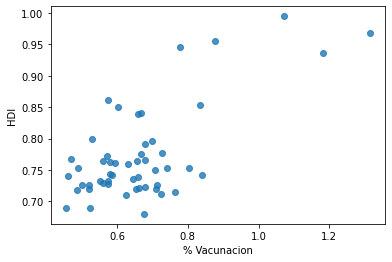

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.Total/datos.Poblacion, y=datos.HDI, alpha= 0.8)
ax.set_xlabel('% Vacunacion')
ax.set_ylabel('HDI')

Text(0, 0.5, '% 3ra edad')

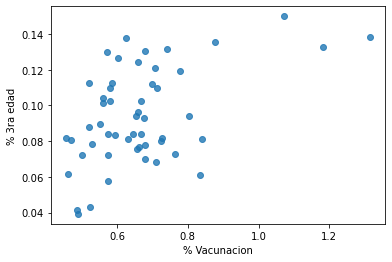

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(6,4))
ax.scatter(x=datos.Total/datos.Poblacion, y=datos.EDAD_65YMAS/datos.Poblacion, alpha= 0.8)
ax.set_xlabel('% Vacunacion')
ax.set_ylabel('% 3ra edad')

In [17]:
print('Si bien se nota un cierta correlacion entre HDI y el % de vacunacion por comuna esta no se ve significativa, tambien podemos apreciar en la segunda grafica que en general donde hay mas personas de la 3ra edad si hay mayor porcentaje de vacunacion, esto se debe yo creo en mayor parte por la estructuracion del calendario de vacunacion el cual tiene un orden decendente en lo que a la edad respecta, por ende son parimero vacunados los de mayor edad.')

Si bien se nota un cierta correlacion entre HDI y el % de vacunacion por comuna esta no se ve significativa, tambien podemos apreciar en la segunda grafica que en general donde hay mas personas de la 3ra edad si hay mayor porcentaje de vacunacion, esto se debe yo creo en mayor parte por la estructuracion del calendario de vacunacion el cual tiene un orden decendente en lo que a la edad respecta, por ende son parimero vacunados los de mayor edad.
